# Australian Quarterly GDP Data 1960Q1 to 2020Q1

# Loading the libraries

In [ ]:
pip install git+https://github.com/statsmodels/statsmodels

In [1]:
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from datetime                    import datetime
from statsmodels.tsa.stattools   import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Setting parameters for visualisation in Seaborn


In [3]:
sns.set_style('whitegrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(18, 10))

In [4]:
from google.colab import files
import io
uploaded = files.upload()

Saving AuQuGDP.xlsx to AuQuGDP.xlsx


In [5]:
df = pd.read_excel('AuQuGDP.xlsx')

In [7]:
df.head()

,Time,AuGDP
0,1960-01-01,6.468300e+10
1,1960-04-01,6.647300e+10
2,1960-07-01,6.662300e+10
3,1960-10-01,6.649000e+10
4,1961-01-01,6.669000e+10


# Setting the time index

In [8]:
df['date'] = pd.to_datetime(df['Time'])
df = df.set_index('date')
df.drop(['Time'], axis=1, inplace=True)
df.head()

,AuGDP
date,
1960-01-01,6.468300e+10
1960-04-01,6.647300e+10
1960-07-01,6.662300e+10
1960-10-01,6.649000e+10
1961-01-01,6.669000e+10


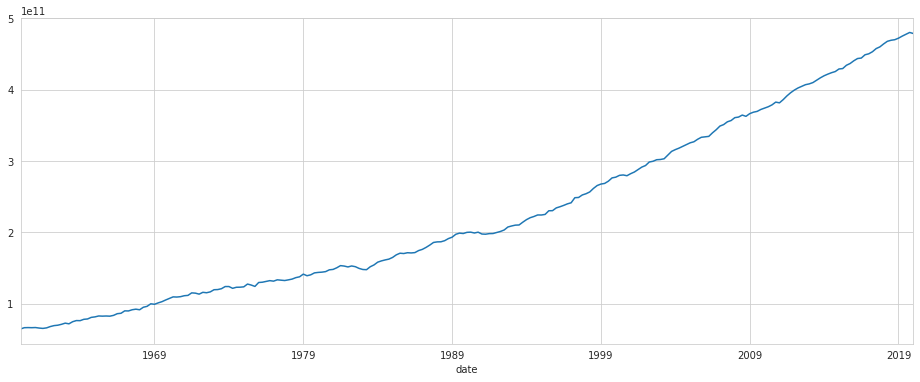

In [9]:
df['AuGDP'].plot()
plt.show()

# Autocorrelation and partial correlation of the dataframe

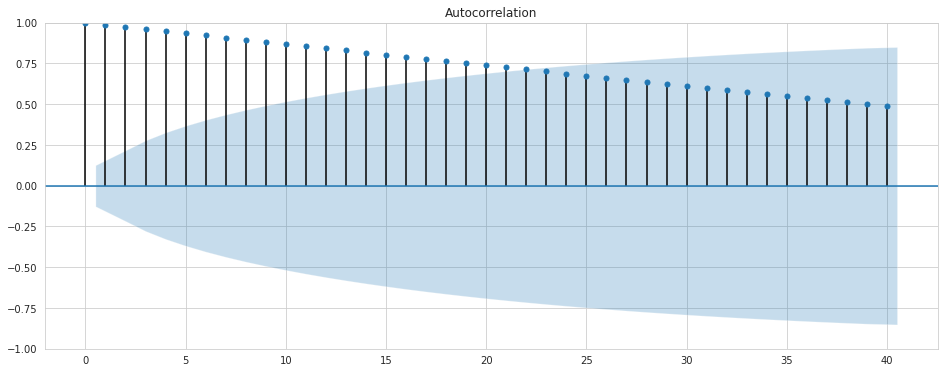

In [11]:
sm.graphics.tsa.plot_acf(df['AuGDP'].values.squeeze(), lags=40)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


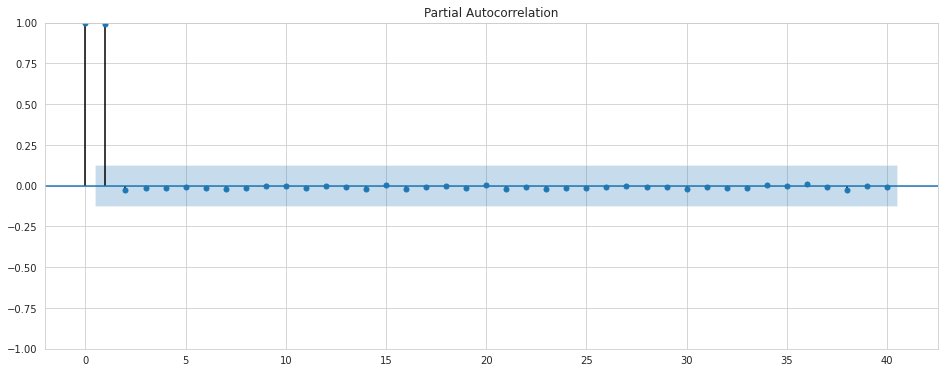

In [12]:
sm.graphics.tsa.plot_pacf(df['AuGDP'].values.squeeze(), lags=40)
plt.show()

#First Order Differencing of the dataframe (GDP_D1)

In [13]:
df2 = df
df2['GDP_D1'] = df2['AuGDP'].diff()
df2 = df2.dropna(axis = 0)

# Line plot of the first order differenced dataframe (GDP_D1)

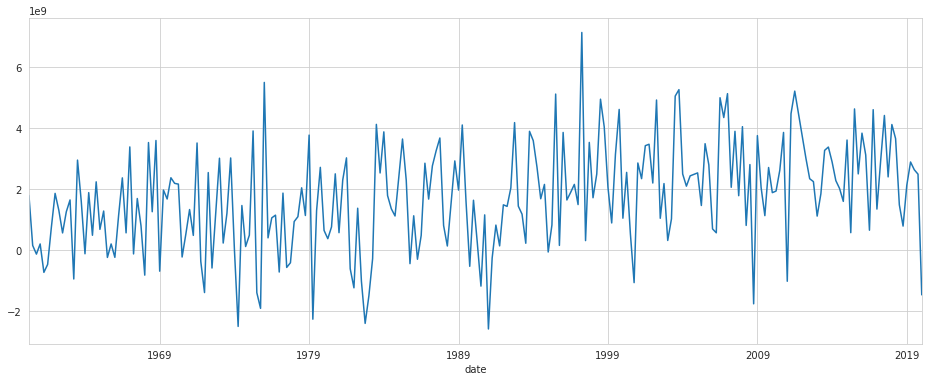

In [14]:
df2['GDP_D1'].plot()
plt.show()

# Autocorrelation of the first order differenced dataframe (GDP_D1)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


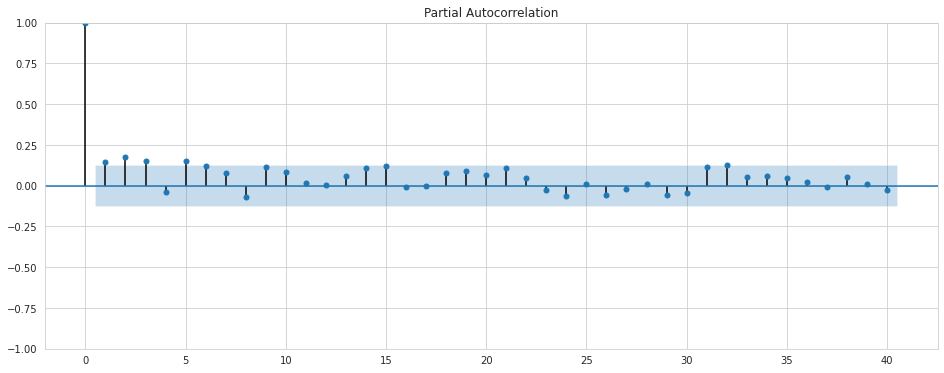

In [15]:
sm.graphics.tsa.plot_pacf(df2['GDP_D1'].values.squeeze(), lags=40)
plt.show()

# Partial correaltion plot of the first order differenced dataframe (GDP_D1)

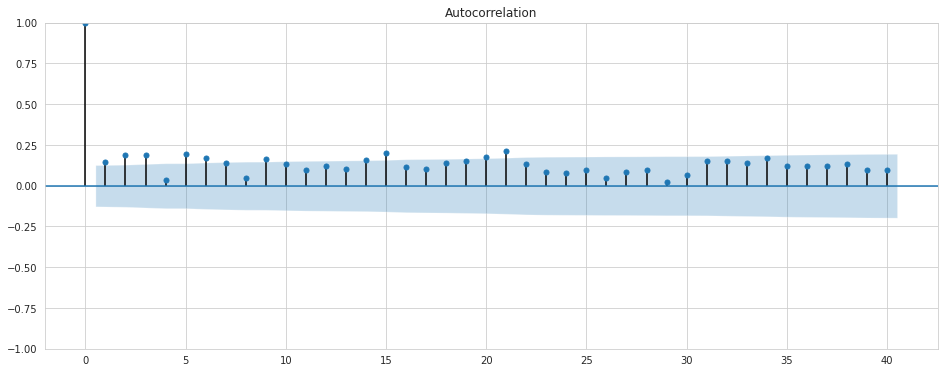

In [16]:
sm.graphics.tsa.plot_acf(df2['GDP_D1'].values.squeeze(), lags=40)
plt.show()

# Augmented Dickey Fuller Test for AuGDP (Original Dataframe) and GDP_D1 (First-Order Differenced Dataframe)

In [17]:
X = df2['AuGDP'].values
result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
#result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

 ADF statistic: -0.433, 
 p-value: 0.986, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


In [18]:
X2 = df2['GDP_D1'].values
result2=adfuller(X2,regression='ct',maxlag=3,regresults=True,store=True)
#result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


# AR(5) Model and Diagnostics

In [20]:
mod = ARIMA(df2['GDP_D1'][df2.index.year<=2018], order=(5,0,0))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 GDP_D1   No. Observations:                  235
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -5319.911
Date:                Fri, 05 Nov 2021   AIC                          10653.822
Time:                        02:37:56   BIC                          10678.040
Sample:                    04-01-1960   HQIC                         10663.586
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.725e+09   6.08e-12   2.84e+20      0.000    1.73e+09    1.73e+09
ar.L1          0.1059      0.060      1.767      0.077      -0.012       0.223
ar.L2          0.1458      0.066      2.194      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


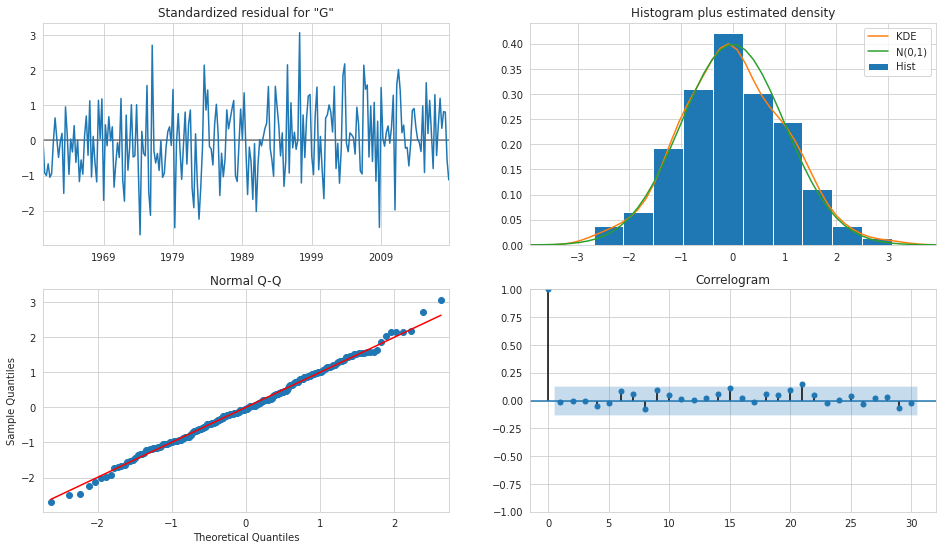

In [21]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

#AR Model Forecast 

In [22]:
res.forecast(steps=1)

2019-01-01    1.811564e+09
Freq: QS-OCT, dtype: float64

In [23]:
res.forecast(steps=4)

2019-01-01    1.811564e+09
2019-04-01    1.782159e+09
2019-07-01    1.891437e+09
2019-10-01    1.782372e+09
Freq: QS-OCT, Name: predicted_mean, dtype: float64

#MA(6) Model and Diagnostics

In [25]:
mod = ARIMA(df2['GDP_D1'][df2.index.year<=2018], order=(0, 0, 6))
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                 GDP_D1   No. Observations:                  235
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -5319.038
Date:                Fri, 05 Nov 2021   AIC                          10654.076
Time:                        05:59:46   BIC                          10681.753
Sample:                    04-01-1960   HQIC                         10665.234
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.725e+09   6.68e-12   2.58e+20      0.000    1.73e+09    1.73e+09
ma.L1          0.0879      0.067      1.308      0.191      -0.044       0.220
ma.L2          0.1718      0.072      2.390      0.0

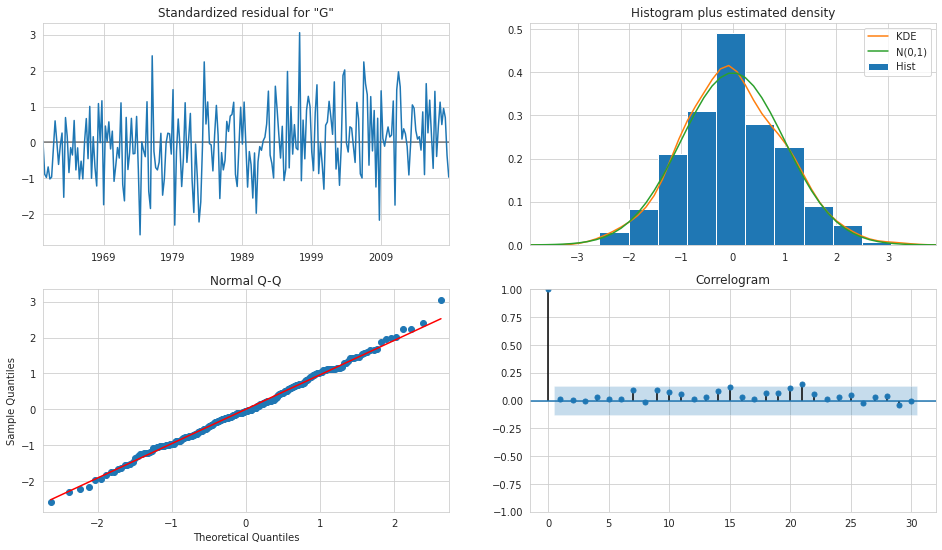

In [26]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

#MA Model Forecast

In [27]:
res.forecast(steps=1)

2019-01-01    1.884415e+09
Freq: QS-OCT, dtype: float64

In [28]:
res.forecast(steps=4)

2019-01-01    1.884415e+09
2019-04-01    1.559540e+09
2019-07-01    1.864562e+09
2019-10-01    1.937100e+09
Freq: QS-OCT, Name: predicted_mean, dtype: float64